In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("shape is:",train.shape)

shape is: (891, 12)


In [6]:
print("no of rows:",len(train))

no of rows: 891


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print("shape of test:",test.shape)

shape of test: (418, 11)


In [9]:
print("no of rows in test:",test.shape[0])

no of rows in test: 418


In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print("Percent of missing 'Age' records is %.2f%%" %((train["Age"].isna().sum()/len(train))*100))


Percent of missing 'Age' records is 19.87%


In [12]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 19.87%


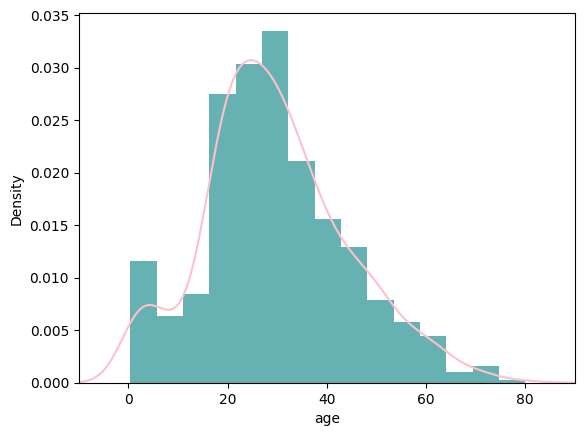

In [13]:
ax=train["Age"].hist(bins=15,density=True,stacked=True,color="teal",alpha=0.6)
train["Age"].plot(kind="density",color="pink")
ax.set_xlabel("age")
plt.xlim([-10,90])
plt.show()

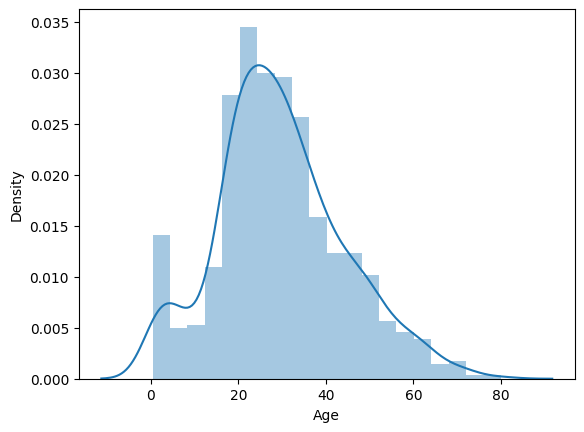

In [14]:
sns.distplot(train["Age"])
plt.show()

In [15]:
print("the mean of age %.2f"%(train["Age"].mean(skipna=True)))

the mean of age 29.70


In [16]:
print("the median of age %.2f"%(train["Age"].median()))

the median of age 28.00


In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
print("the percentage of null cabin records %.2f%%"%(train["Cabin"].isna().sum()/len(train)*100))

the percentage of null cabin records 77.10%


In [19]:
print("the percentage of null Embarked records %.2f%%"%(train["Embarked"].isna().sum()/len(train)*100))

the percentage of null Embarked records 0.22%


In [20]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
train["Embarked"].value_counts()

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

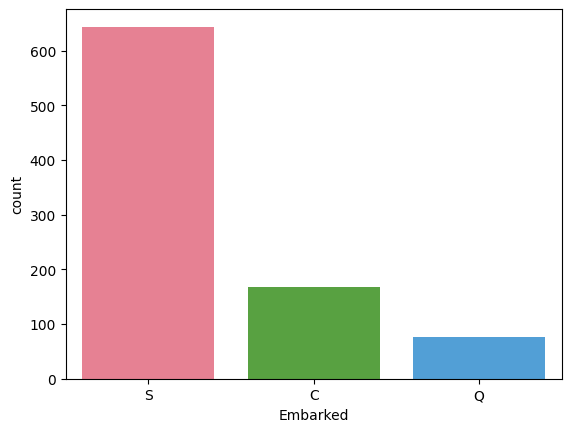

In [21]:
sns.countplot(data=train,x="Embarked",palette="husl")

plt.show()

In [22]:
print("the most common board in embarked is %s."%(train["Embarked"].value_counts().idxmax()))

the most common board in embarked is S.


In [23]:
train_c=train.copy()

In [24]:
train_c["Age"].fillna(train_c["Age"].median(),inplace=True)
train_c["Embarked"].fillna(train_c["Embarked"].value_counts().idxmax(),inplace=True)
train_c.drop(["Cabin"],axis=1,inplace=True)

In [25]:
train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
train_c.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

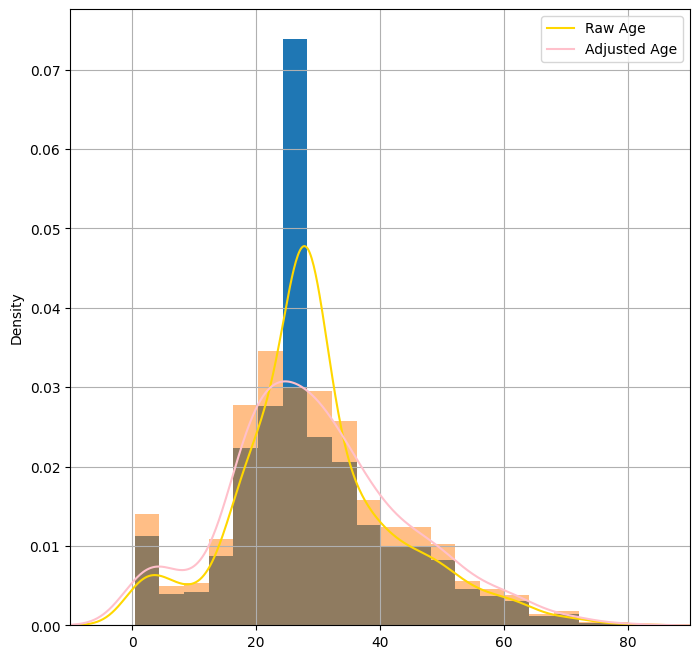

In [28]:
plt.figure(figsize=(8,8))
train_c["Age"].hist(bins=20,density=True)
train_c["Age"].plot(kind="density",color="gold")
train["Age"].hist(bins=20,density=True,alpha=0.5)
train["Age"].plot(kind="density",color="pink")
plt.legend(['Raw Age', 'Adjusted Age'])
plt.grid()
plt.xlim([-10,90])
plt.show()

In [29]:
train_c['TravelAlone']=np.where((train_c["SibSp"]+train_c["Parch"])>0, 0, 1)
train_c.drop('SibSp', axis=1, inplace=True)
train_c.drop('Parch', axis=1, inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [32]:
train_c.drop(["TravelAlone"],axis=1,inplace=True)

In [33]:
train_c

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C


In [34]:
train_c["TravelAlone"]=np.where(train["SibSp"]+train["Parch"]>0,0,1)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [37]:
training=pd.get_dummies(train_c,columns=["Pclass","Embarked","Sex"],dtype=int)

In [38]:
training

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,211536,13.0000,1,0,1,0,0,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,1,1,0,0,0,0,1,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.4500,0,0,0,1,0,0,1,1,0
889,890,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,1,1,0,0,1,0,0,0,1


In [39]:
training.drop(["Sex_female","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [40]:
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [41]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
test_data=test.copy()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test_data["Age"]=test_data["Age"].median()
test_data["Fare"]=test_data["Fare"].median()
test_data.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [44]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,27.0,0,0,14.4542,Q
1,3,female,27.0,1,0,14.4542,S
2,2,male,27.0,0,0,14.4542,Q
3,3,male,27.0,0,0,14.4542,S
4,3,female,27.0,1,1,14.4542,S


In [45]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
test_data["TravelAlone"]=np.where(test_data["SibSp"]+test_data["Parch"]>0,0,1)

In [47]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TravelAlone
0,3,male,27.0,0,0,14.4542,Q,1
1,3,female,27.0,1,0,14.4542,S,0
2,2,male,27.0,0,0,14.4542,Q,1
3,3,male,27.0,0,0,14.4542,S,1
4,3,female,27.0,1,1,14.4542,S,0


In [48]:
test_data.drop(["SibSp","Parch"],axis=1,inplace=True)

In [49]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,3,male,27.0,14.4542,Q,1
1,3,female,27.0,14.4542,S,0
2,2,male,27.0,14.4542,Q,1
3,3,male,27.0,14.4542,S,1
4,3,female,27.0,14.4542,S,0


In [50]:
testing=pd.get_dummies(test_data,columns=["Pclass","Embarked","Sex"],dtype=int)

In [51]:
testing.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,27.0,14.4542,1,0,0,1,0,1,0,0,1
1,27.0,14.4542,0,0,0,1,0,0,1,1,0
2,27.0,14.4542,1,0,1,0,0,1,0,0,1
3,27.0,14.4542,1,0,0,1,0,0,1,0,1
4,27.0,14.4542,0,0,0,1,0,0,1,1,0


In [52]:
testing.drop(["Sex_female"],axis=1,inplace=True)

In [53]:
testing.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,27.0,14.4542,1,0,0,1,0,1,0,1
1,27.0,14.4542,0,0,0,1,0,0,1,0
2,27.0,14.4542,1,0,1,0,0,1,0,1
3,27.0,14.4542,1,0,0,1,0,0,1,1
4,27.0,14.4542,0,0,0,1,0,0,1,0


In [54]:
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


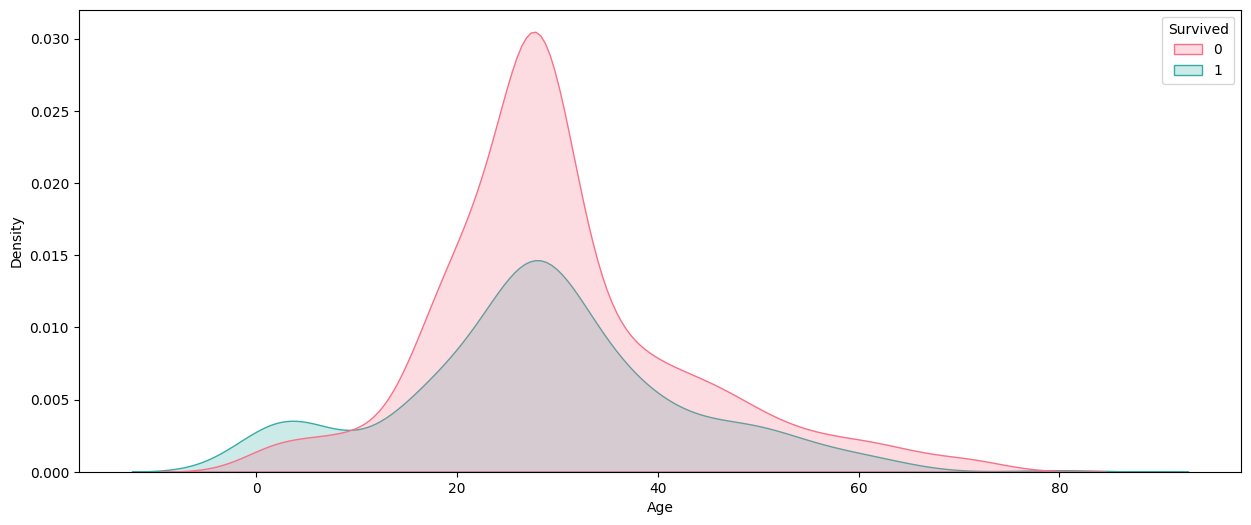

In [55]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=training,x="Age",hue="Survived",palette="husl",shade=True)
plt.show()

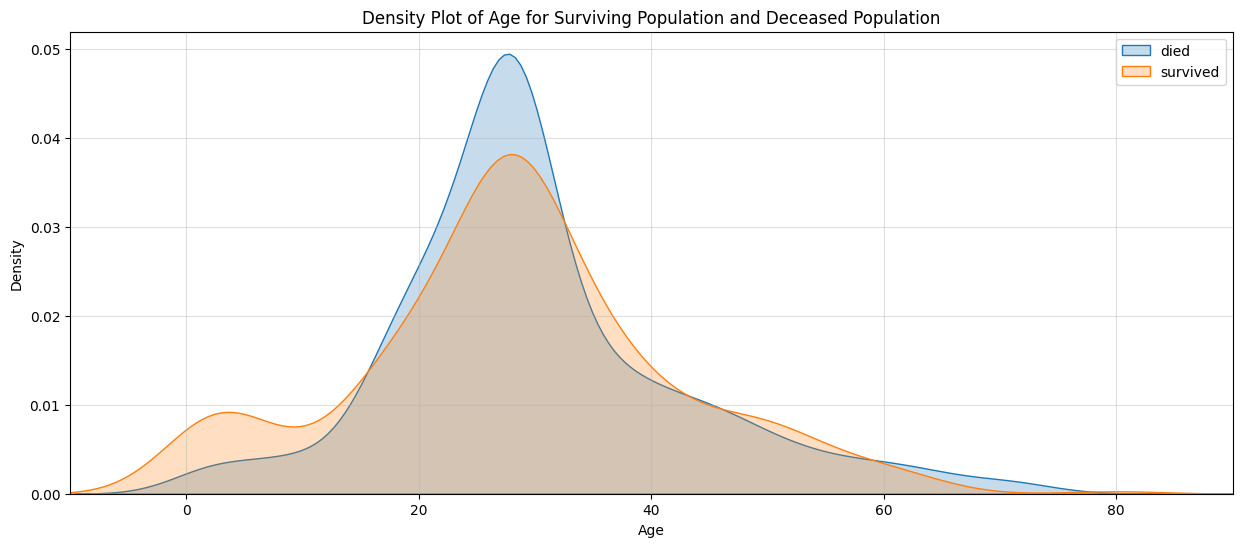

In [56]:
plt.figure(figsize=(15,6))
ax=sns.kdeplot(training["Age"][training.Survived==0],shade=True)
sns.kdeplot(training["Age"][training.Survived==1],shade=True)
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.legend(["died","survived"])
plt.xlim(-10,90)
plt.grid(True,alpha=0.4)
plt.show()

In [57]:
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


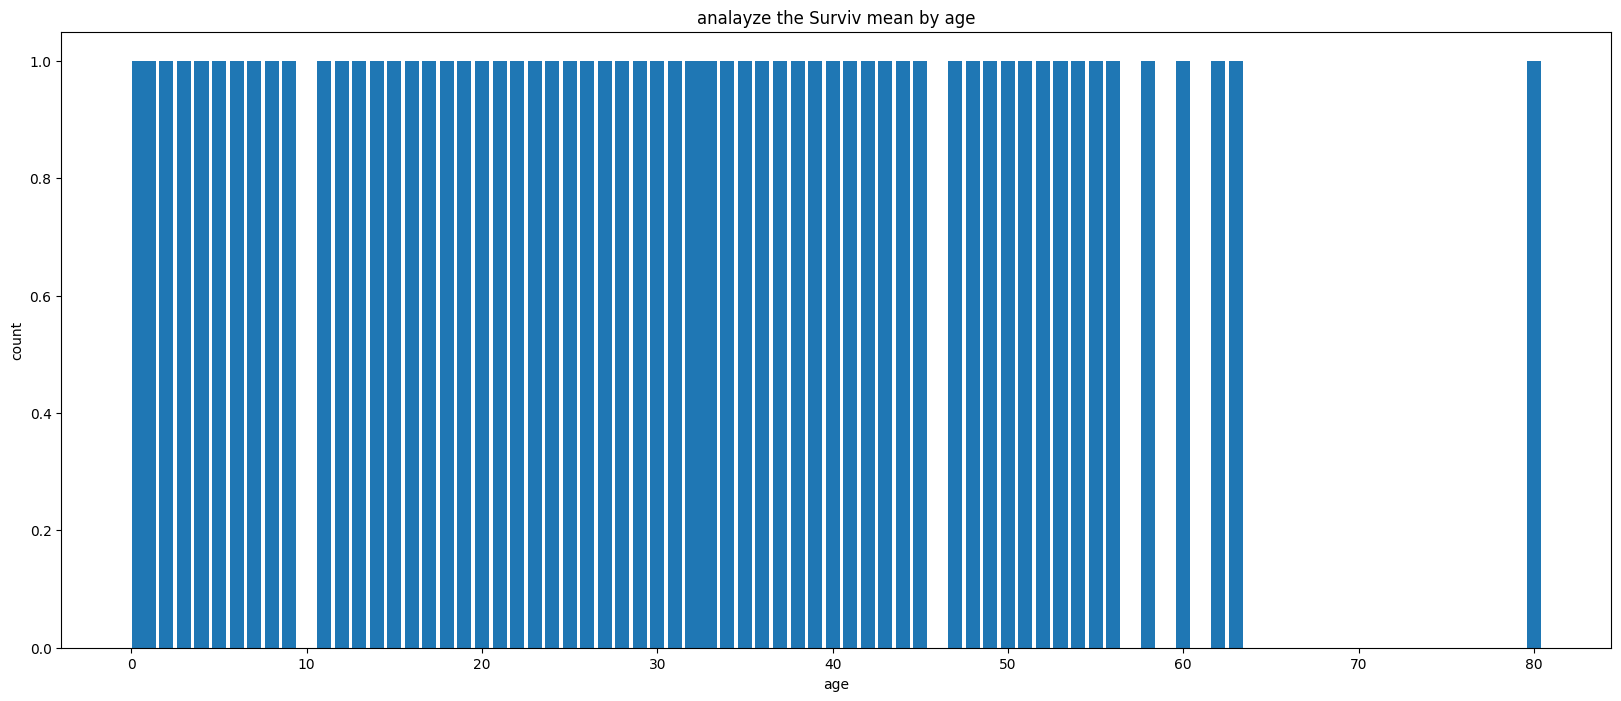

In [58]:
plt.figure(figsize=(20,8))
avg=training.groupby(["Age","Survived"],as_index=False)["Age"].mean()
plt.bar(avg["Age"],avg["Survived"])
plt.title("analayze the Surviv mean by age")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

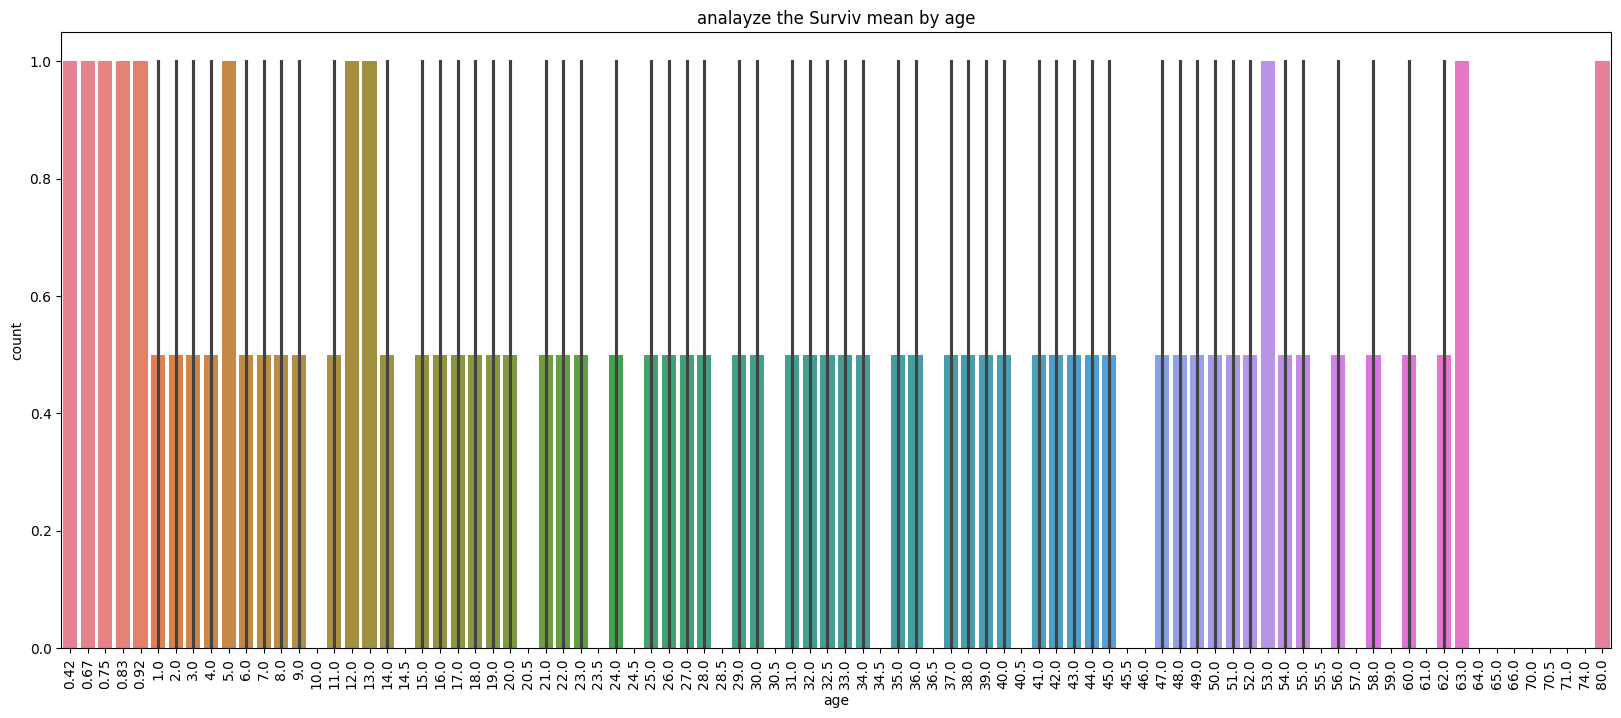

In [59]:
plt.figure(figsize=(20,8))
sns.barplot(data=avg,x="Age",y="Survived",palette="husl")
plt.title("analayze the Surviv mean by age")
plt.xlabel("age")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

In [60]:
training["IsMinor"]=np.where(training["Age"]<=16,1,0)
testing["IsMinor"]=np.where(testing["Age"]<=16,1,0)

In [61]:
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


In [62]:
testing.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,27.0,14.4542,1,0,0,1,0,1,0,1,0
1,27.0,14.4542,0,0,0,1,0,0,1,0,0
2,27.0,14.4542,1,0,1,0,0,1,0,1,0
3,27.0,14.4542,1,0,0,1,0,0,1,1,0
4,27.0,14.4542,0,0,0,1,0,0,1,0,0


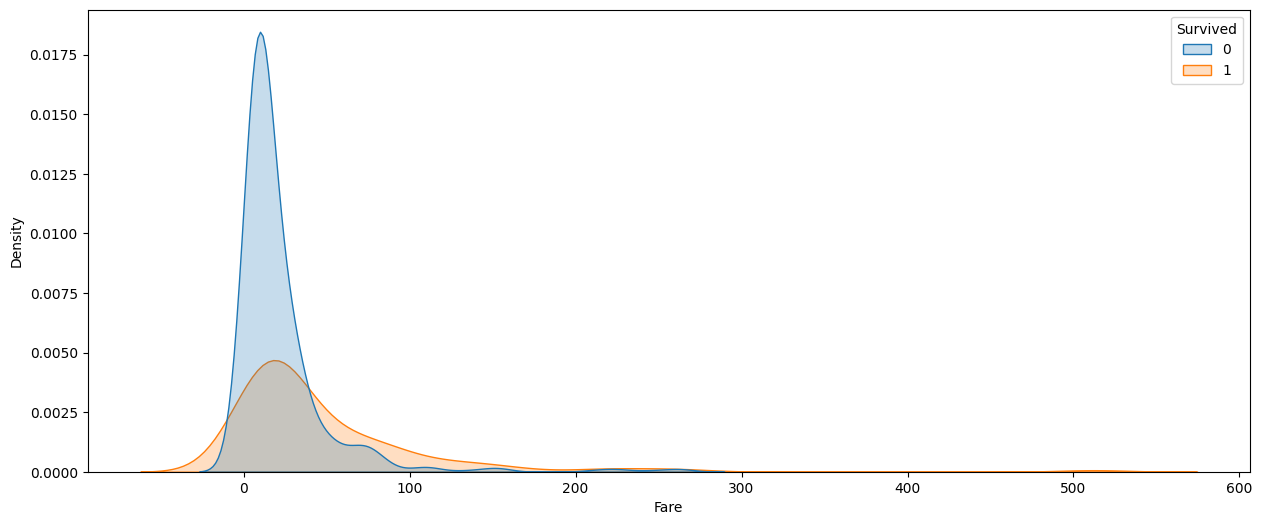

In [63]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=training,x="Fare",hue="Survived",shade=True)
plt.show()

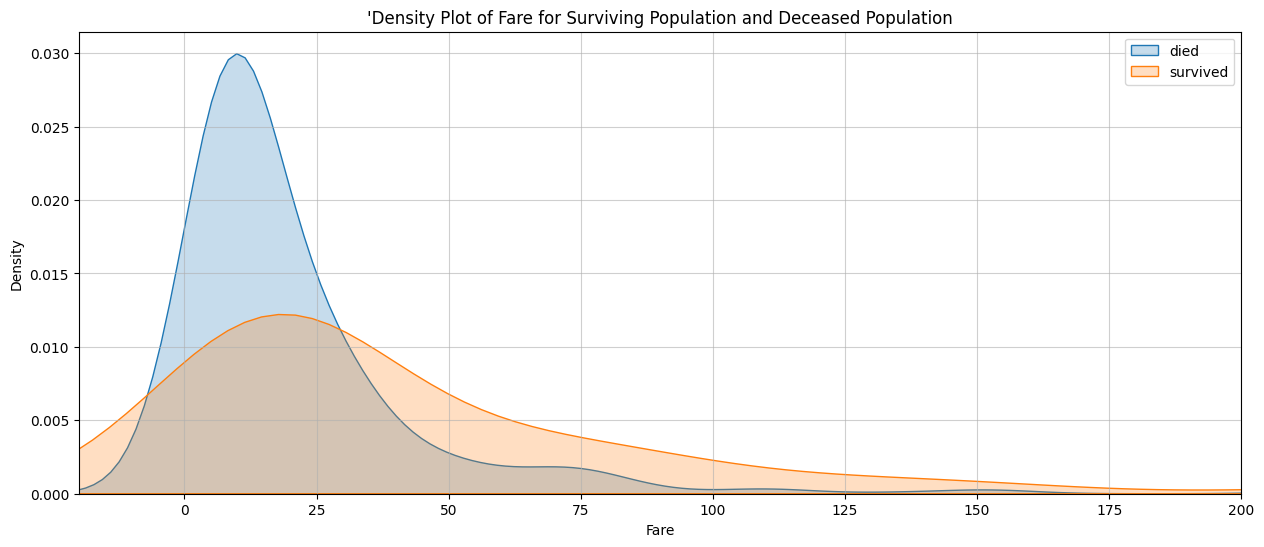

In [64]:
plt.figure(figsize=(15,6))
sns.kdeplot(training["Fare"][training.Survived==0],shade=True)
sns.kdeplot(training["Fare"][training.Survived==1],shade=True)
plt.title("'Density Plot of Fare for Surviving Population and Deceased Population")
plt.xlim([-20,200])
plt.legend(["died","survived"])
plt.grid(True,alpha=0.6)
plt.show()

In [65]:
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


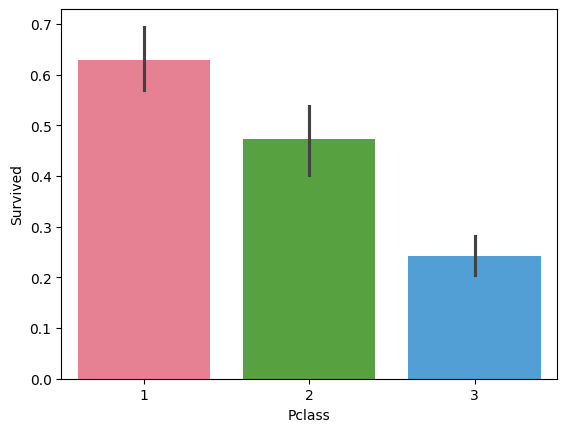

In [67]:
sns.barplot(x="Pclass",y="Survived",data=train,palette="husl")
plt.show()

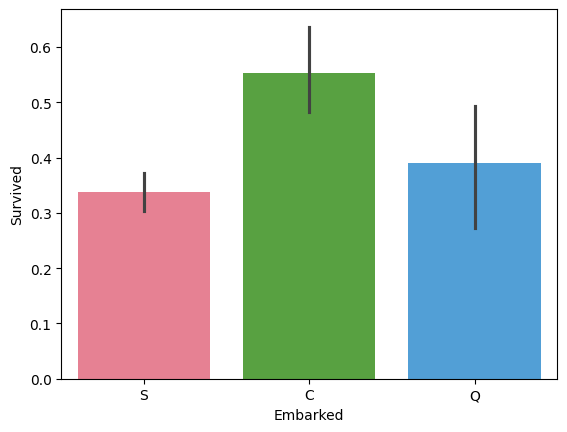

In [68]:
sns.barplot(data=train,x="Embarked",y="Survived",palette="husl")
plt.show()

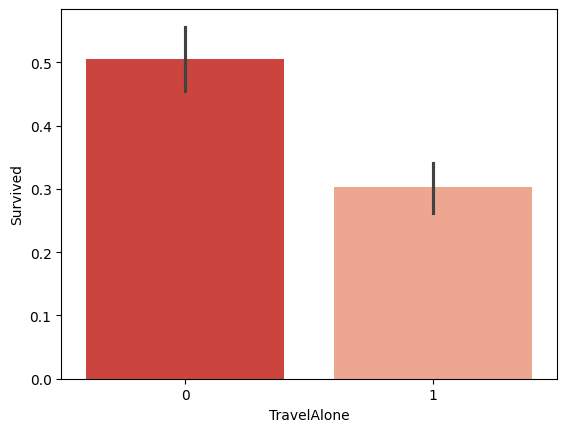

In [69]:
sns.barplot(data=training,x="TravelAlone",y="Survived",palette="Reds_r")
plt.show()

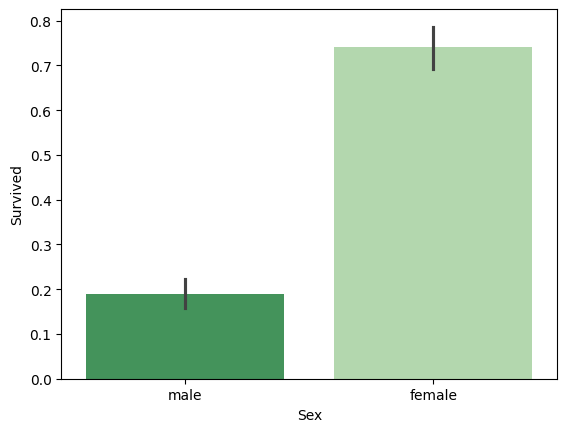

In [70]:
sns.barplot(data=train,x="Sex",y="Survived",palette="Greens_r")
plt.show()

In [71]:
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
X=training.drop(["Survived"],axis=1)
y=training.Survived.values

model=LogisticRegression()
rfe = RFE(model, step=8)

In [73]:
rfe

RFE(estimator=LogisticRegression(), step=8)

In [74]:
rfe.fit(X,y)

RFE(estimator=LogisticRegression(), step=8)

In [75]:
print("selected columns %s"%[X.columns[rfe.support_]])

selected columns [Index(['Pclass_1', 'Pclass_3', 'Embarked_Q', 'Sex_male', 'IsMinor'], dtype='object')]


In [76]:
X.columns[rfe.support_]

Index(['Pclass_1', 'Pclass_3', 'Embarked_Q', 'Sex_male', 'IsMinor'], dtype='object')

In [77]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(model,step=1,cv=10,scoring="accuracy")
rfecv.fit(X,y)

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [78]:
print("optimal number of feaures:",rfecv.n_features_)

optimal number of feaures: 10


In [79]:
print("selected features: %s"%list(X.columns[rfecv.support_]))

selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']


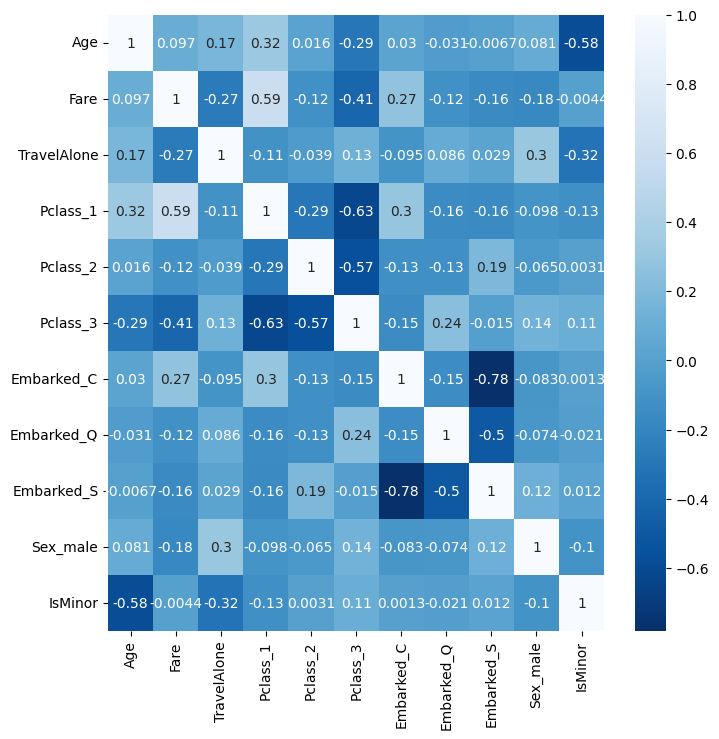

In [80]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True,cmap="Blues_r")
plt.show()

train_test_splits results
LogisticRegressionaccuracy is 0.777
LogisticRegressionlog_loss is 0.232
LogisticRegressionauc is 0.840


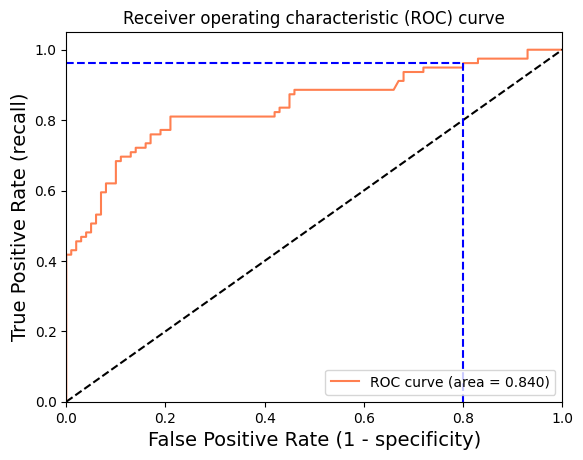

Using a threshold of 0.067 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,log_loss

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print("train_test_splits results")
print(model.__class__.__name__+"accuracy is %2.3f"%accuracy_score(y_test,y_pred))
print(model.__class__.__name__+"log_loss is %2.3f"%log_loss(y_pred,y_pred_proba))
print(model.__class__.__name__+"auc is %2.3f"%auc(fpr,tpr))
idx=np.min(np.where(tpr >0.95))



plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [89]:
from sklearn.model_selection import cross_val_score

model=LogisticRegression()
scores_accuracy=cross_val_score(model,X,y,cv=10,scoring="accuracy")
scores_log_loss=cross_val_score(model,X,y,cv=10,scoring="neg_log_loss")
score_auc=cross_val_score(model,X,y,cv=10,scoring="roc_auc")
print("kfold crossvalidation results")
print(model.__class__.__name__+"average accuracy %2.3f"%scores_accuracy.mean())
print(model.__class__.__name__+"average logloss %2.3f"%-scores_log_loss.mean())
print(model.__class__.__name__+"average auc  %2.3f"%score_auc.mean())

kfold crossvalidation results
LogisticRegressionaverage accuracy 0.799
LogisticRegressionaverage logloss 0.456
LogisticRegressionaverage auc  0.848


In [90]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

In [91]:
scoring.values()

dict_values(['accuracy', 'neg_log_loss', 'roc_auc'])

In [92]:
modelcv=LogisticRegression()
results=cross_validate(modelcv,X,y,cv=10,scoring=list(scoring.values()),return_train_score=False)

In [93]:
results

{'fit_time': array([0.04686308, 0.03124237, 0.04684711, 0.04686594, 0.04686618,
        0.03124213, 0.04686785, 0.03124309, 0.01562095, 0.01562572]),
 'score_time': array([0.01562285, 0.01563764, 0.        , 0.01561975, 0.0156188 ,
        0.01562285, 0.01561666, 0.01562047, 0.01562214, 0.        ]),
 'test_accuracy': array([0.76666667, 0.78651685, 0.78651685, 0.84269663, 0.79775281,
        0.78651685, 0.78651685, 0.78651685, 0.84269663, 0.80898876]),
 'test_neg_log_loss': array([-0.47758558, -0.47355547, -0.54178026, -0.41229534, -0.43087508,
        -0.45654535, -0.43964046, -0.47589303, -0.40607466, -0.44097822]),
 'test_roc_auc': array([0.83220779, 0.84385027, 0.78262032, 0.89438503, 0.8513369 ,
        0.8513369 , 0.85561497, 0.82994652, 0.87967914, 0.85978836])}

In [101]:
print("kfold cross_validation results:")
for i in range(len(scoring)):

      print(modelcv.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[i], -results['test_%s' % list(scoring.values())[i]].mean()
                               if list(scoring.values())[i]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[i]].mean(), 
                               results['test_%s' % list(scoring.values())[i]].std()))


kfold cross_validation results:
LogisticRegression average accuracy: 0.799 (+/-0.024)
LogisticRegression average log_loss: 0.456 (+/-0.037)
LogisticRegression average auc: 0.848 (+/-0.029)


In [104]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":np.arange(1e-05, 3, 0.1)}
scoring={'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
gs=GridSearchCV(model,return_train_score=True,param_grid=param_grid,scoring=scoring,cv=10,refit="Accuracy")
gs.fit(X,y)
results=gs.cv_results_
print("="*30)
print("best params:"+str(gs.best_estimator_))
print("best params:"+str(gs.best_params_))
print("best score:"+str(gs.best_score_))
print("="*30)

best params:LogisticRegression(C=0.60001)
best params:{'C': 0.60001}
best score:0.8036329588014981


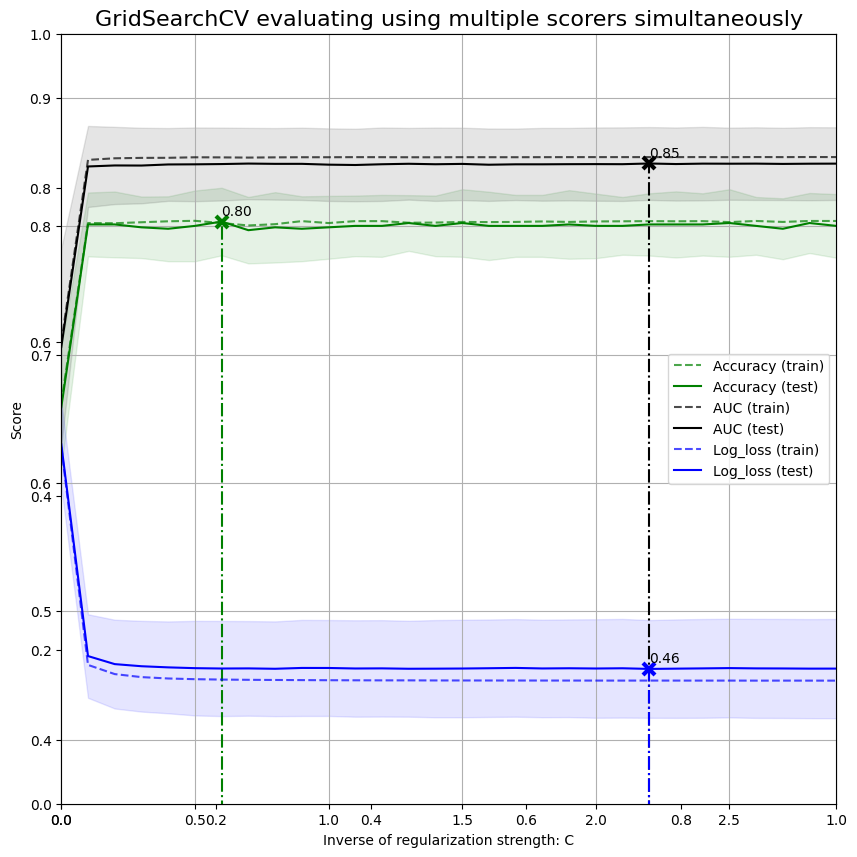

In [105]:
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()
ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)


# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

c=np.arange(1e-05, 5.5, 0.1)
scoring={'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
model=LogisticRegression()
std_scale=StandardScaler(with_mean=False,with_std=False)
n_folds=5
n_repeats=5

rskfold=RepeatedStratifiedKFold(n_splits=n_folds,n_repeats=n_repeats,random_state=2)

In [111]:
log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',model)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=c), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.10001))])
best params: {'clf__C': 0.10001}
best score: 0.8017889649111796


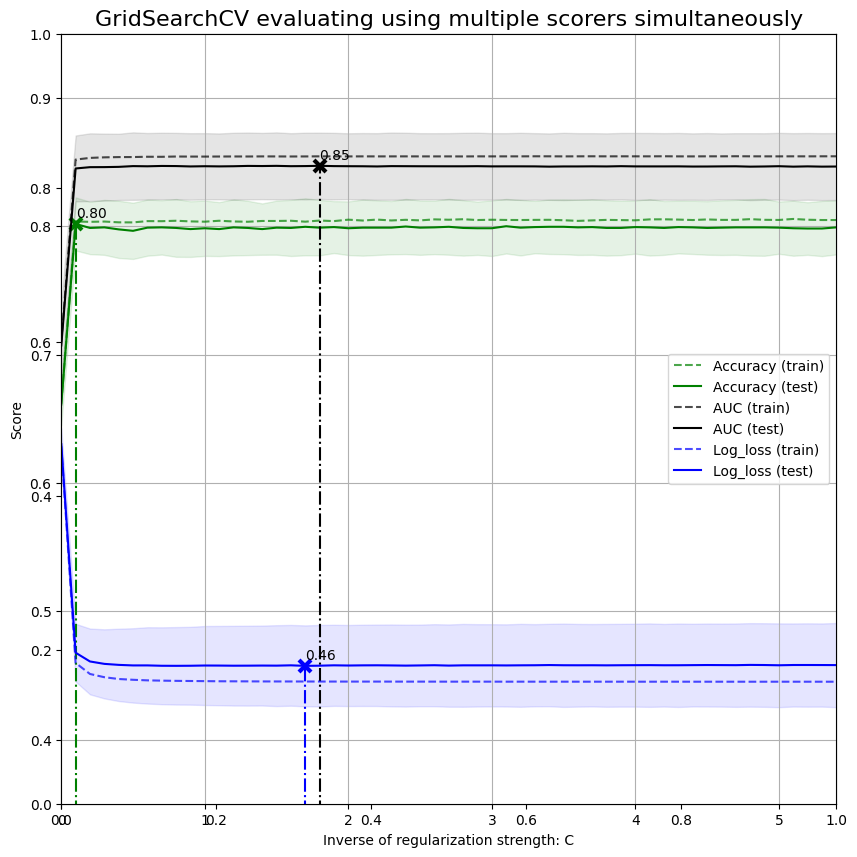

In [113]:

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, c.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [119]:
training['Survived'] = log_clf.predict(training[X.columns])
training['PassengerId'] = test['PassengerId']

submission = training[['PassengerId','Survived']]

submission

,PassengerId,Survived
0,892.0,0
1,893.0,1
2,894.0,0
3,895.0,1
4,896.0,0
...,...,...
886,NaN,0
887,NaN,1
888,NaN,0
889,NaN,1


In [120]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64